In [1]:
from data_cleaning import *
from data_analysis import *

## Data cleaning

By calling the functions, we create the clean csv files for the corresponding years

In [2]:
clean_data('data/viasatChargingData.csv', 2021)
clean_data('data/viasatChargingData2024.csv', 2023)
clean_data('data/viasatChargingData2024.csv', 2024)

## Data visualization (for latest string of data: mar 2023 - feb 2024)

**Since we don't have updated complete data for an entire year, we will use data from March 2023 to February 2024**

**UPDATE THIS WITH ALL DATA**

In [3]:

# Load CSV files
df_2023 = pd.read_csv('clean_data/viasatChargingDataClean2023.csv')
df_2024 = pd.read_csv('clean_data/viasatChargingDataClean2024.csv')

# Convert 'Start Date' to datetime
df_2023['Start Date'] = pd.to_datetime(df_2023['Start Date'])
df_2024['Start Date'] = pd.to_datetime(df_2024['Start Date'])

# Filter data for March to December 2023 and January to February 2024
df_filtered_2023 = df_2023[(df_2023['Start Date'].dt.year == 2023) & (df_2023['Start Date'].dt.month >= 3)]
df_filtered_2024 = df_2024[(df_2024['Start Date'].dt.year == 2024) & (df_2024['Start Date'].dt.month <= 2)]

# Concatenate the filtered DataFrames
viasatCharging_df = pd.concat([df_filtered_2023, df_filtered_2024], ignore_index=True)


**EXAMPLE OF NORMAL USAGE!**

In [4]:
# viasatCharging_df= pd.read_csv('clean_data/viasatChargingDataClean2021.csv')

### 'Ended By' analysis

**Our understanding of each value**

*Plug Out at Vehicle*: The charging session ended because the charging plug was manually disconnected from the vehicle.

*Customer*: The charging session was intentionally stopped by the customer, possibly through a user interface or mobile app.

*CPS Server*: The charging session was terminated by the central processing server. This might happen due to various reasons such as system errors, maintenance, or remote commands.

*Timeout*: The charging session ended because it reached a predefined maximum duration without being stopped by the user or other conditions.

*Plug Removed While Rebooting*: The charging plug was disconnected during a system reboot, likely causing an interruption in the charging process.

*Ghost session closed*: A "ghost session" typically refers to a charging session that appears to be active in the system but is not actually ongoing. The system may close these sessions to correct discrepancies.

*Unknown*: The reason for ending the charging session is not identified or recorded. This could be due to various uncertainties or missing data.

*ghost_session*: ?

*Station Offline*: The charging station went offline during the session, leading to an automatic termination of the charging process.

*Outlet Unreachable*: The specific outlet being used for charging became unreachable, possibly due to connectivity issues or hardware failure, resulting in the session ending.

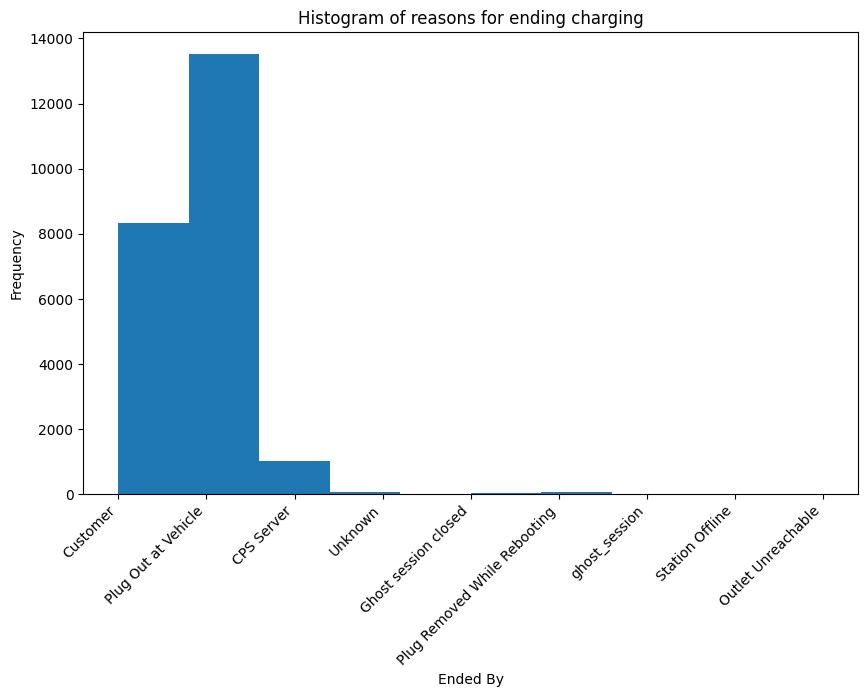

In [5]:
reasons_end_charging(viasatCharging_df)

### Charging Time

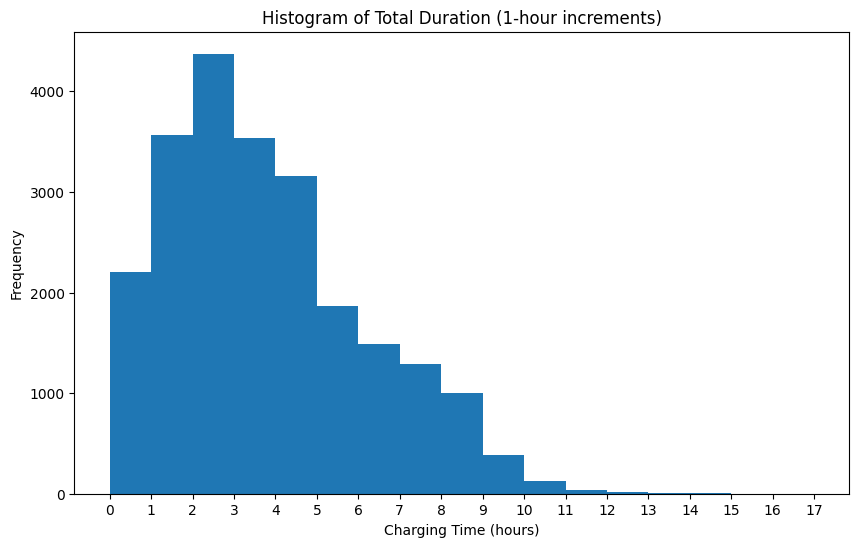

In [6]:
total_duration(viasatCharging_df)

### Start and End Times Grouped by Hour

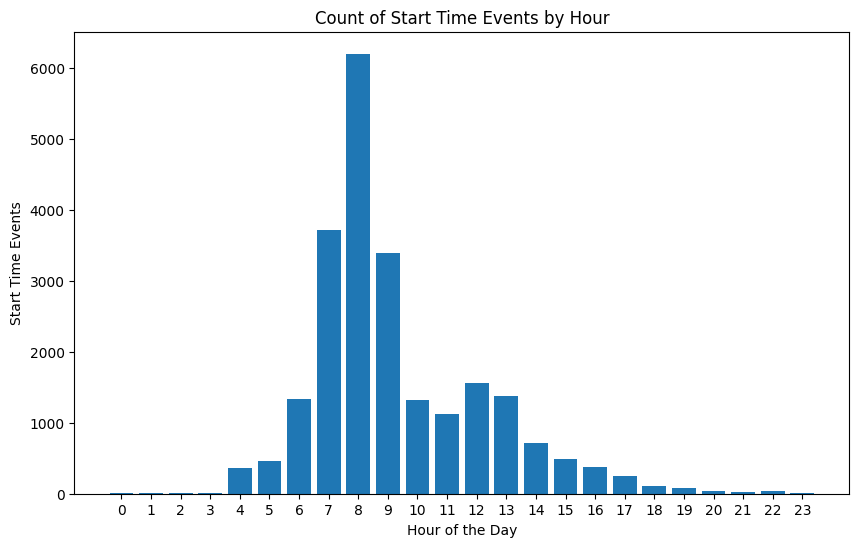

In [7]:
start_times_grouped_by_hours(viasatCharging_df)

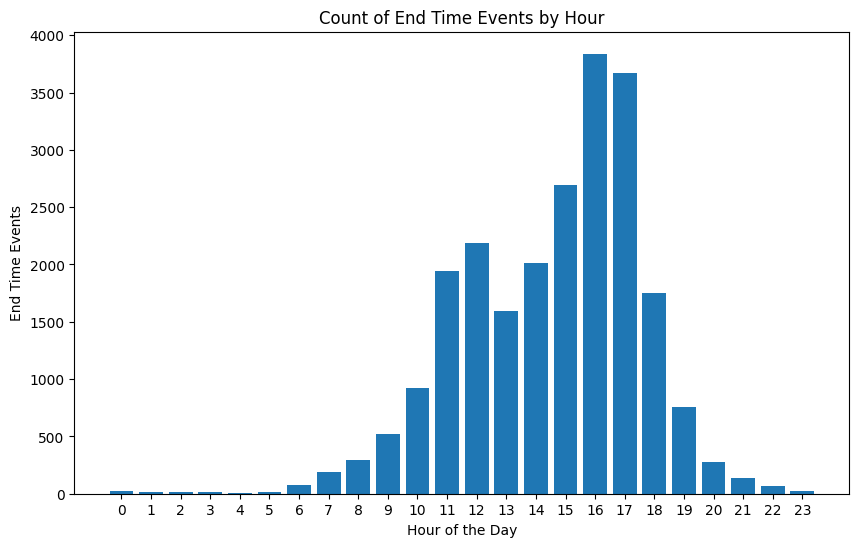

In [8]:
end_times_grouped_by_hours(viasatCharging_df)

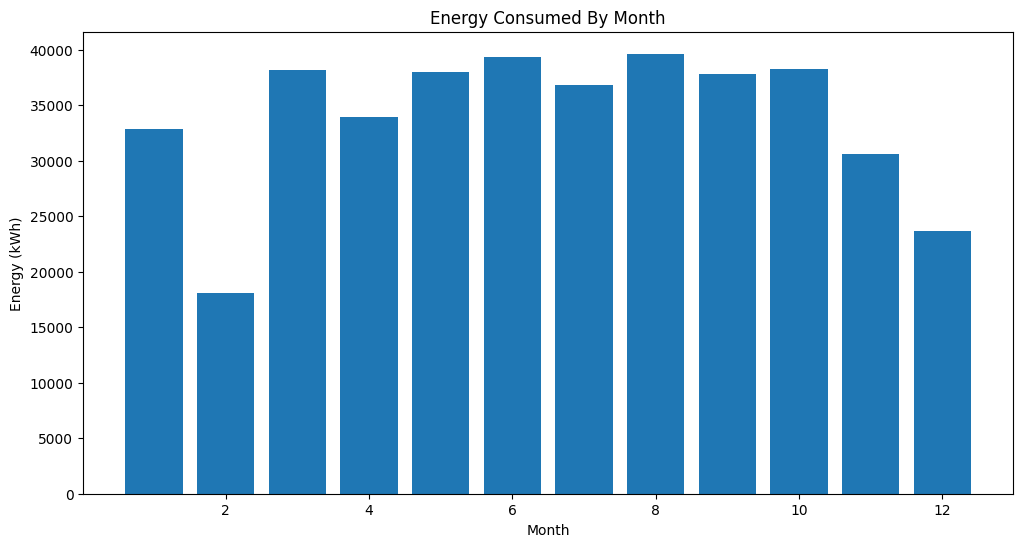

Average: 33931.99933333334


In [9]:
energy_consumption_by_month(viasatCharging_df)

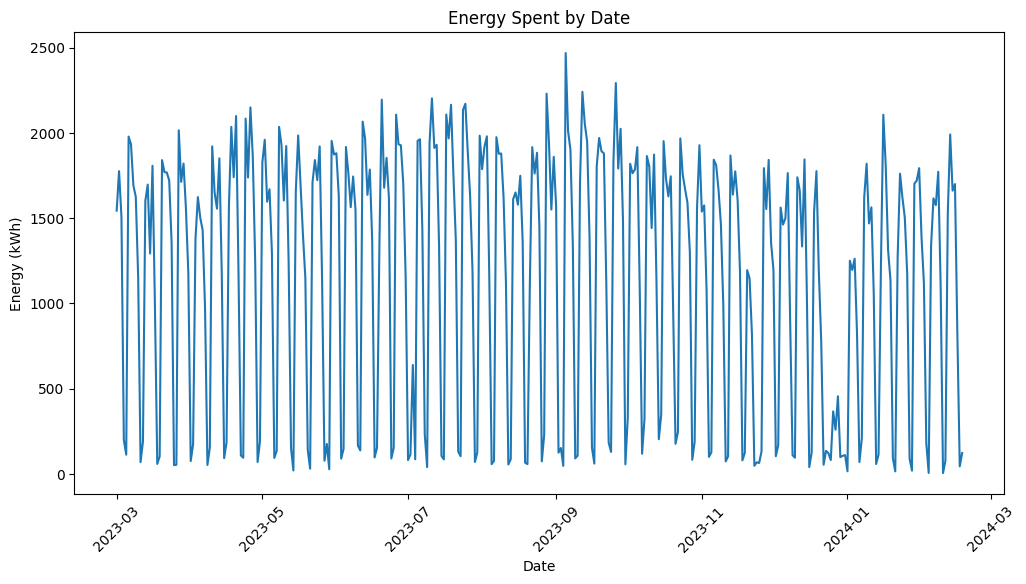

In [10]:
charging_trends_per_month(viasatCharging_df)

### Extracting information

#### Daily data statistics

In [11]:
daily_data_table(viasatCharging_df)

,Start Date,total_charging_time,avg_charging_time,max_charging_time,min_charging_time,total_energy,avg_energy,max_energy,min_energy
0,2023-03-01,14 days 13:34:29,03:34:01,09:13:45,00:00:59,1543.315,15.748112,51.641,0.043
1,2023-03-02,16 days 14:31:43,03:54:25,08:54:34,00:00:37,1775.203,17.403951,50.411,0.030
2,2023-03-03,13 days 10:29:08,03:47:38,12:14:35,00:00:18,1507.154,17.731224,57.669,0.008
3,2023-03-04,1 days 09:34:25,04:47:46,12:26:15,00:00:42,199.018,28.431143,73.490,0.041
4,2023-03-05,0 days 20:36:33,03:26:05,08:48:15,00:35:21,112.117,18.686167,51.898,3.494
...,...,...,...,...,...,...,...,...,...
350,2024-02-14,15 days 02:34:03,03:56:27,08:57:07,00:00:36,1660.643,18.050467,53.496,0.017
351,2024-02-15,15 days 00:55:06,03:50:22,08:31:37,00:01:09,1699.469,18.079457,51.733,0.044
352,2024-02-16,7 days 16:50:45,03:33:17,10:13:21,00:23:01,825.192,15.869077,43.551,1.052
353,2024-02-17,0 days 08:04:54,01:36:58,03:58:29,00:29:12,43.545,8.709000,23.827,2.893


#### Monthly data statistics

In [12]:
monthly_data_table(viasatCharging_df)

,Year,Month,total_charging_time,avg_charging_time,max_charging_time,min_charging_time,total_energy,avg_energy,max_energy,min_energy
0,2023,3,349 days 15:42:11,03:49:48,14:01:21,00:00:02,38157.089,17.415376,73.490,0.000
1,2023,4,316 days 12:28:14,03:44:05,14:33:26,00:00:01,33945.544,16.689058,65.185,0.000
2,2023,5,344 days 20:43:34,03:47:16,12:47:09,00:00:01,37965.182,17.375369,66.926,0.000
3,2023,6,355 days 11:09:53,03:39:24,11:48:06,00:00:03,39387.380,16.882718,68.592,0.000
4,2023,7,336 days 06:02:31,03:52:33,14:51:20,00:00:03,36802.074,17.676308,68.854,0.000
5,2023,8,363 days 11:21:14,03:45:18,13:46:41,00:00:07,39654.615,17.070433,75.562,0.000
6,2023,9,337 days 10:42:29,03:48:53,17:50:23,00:00:01,37797.046,17.803602,93.466,0.000
7,2023,10,329 days 18:31:52,03:53:55,17:30:18,00:00:02,38283.780,18.859005,105.361,0.000
8,2023,11,270 days 15:32:19,03:43:59,12:52:14,00:00:02,30624.755,17.600434,73.329,0.000
9,2023,12,205 days 13:11:22,03:45:56,16:50:10,00:00:01,23673.113,18.071079,66.716,0.000


## Conclusions

In [19]:
conclusion = average_total_energy_per_day(viasatCharging_df)
print(f"The average energy consumed by the carport per day is {conclusion.round(2)} kWh")

The average energy consumed by the carport per day is 1147.0 kWh


## Data visualization (all years)

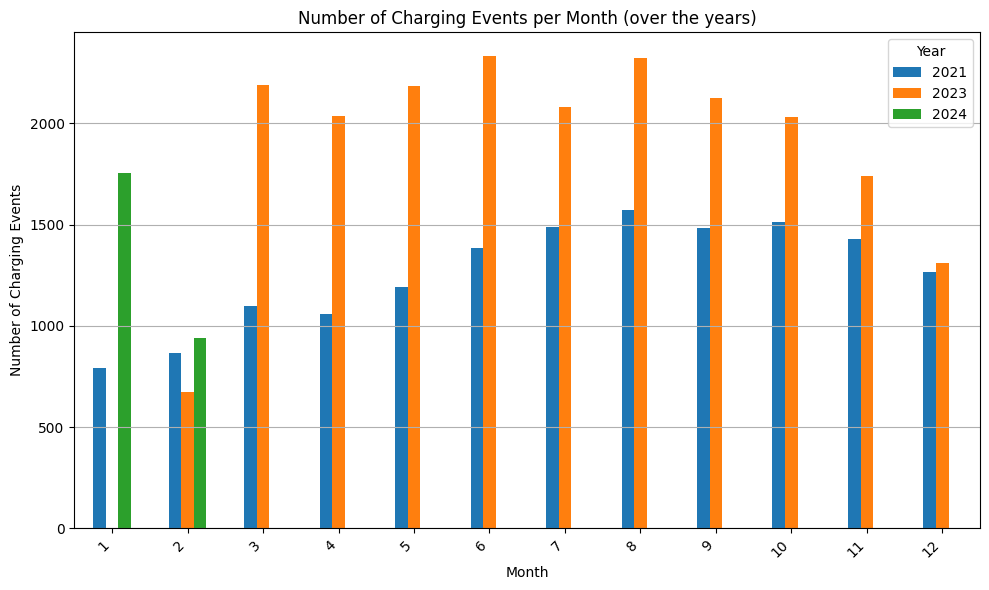

In [14]:
full_df = combine_datasets()
charging_events_per_month_per_year(full_df)